## Arewa Data Science Academy
### Deep Learning Cohort1.0

#### Name: Abdulrahman Yusuf
#### Email: audura2013@gmail.com
#### Title: Week 2 advanced Assignment Solution

In [1]:
import torch
from torch import nn # to import nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

**Q1: Create a straight line dataset using the linear regression formula (weight * X + bias).**

In [2]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data with 100 data points
start = 0
end = 1
step = 0.01
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

print(X[:10]), print(y[:10])
print(f"Number of samples in X: {X.shape}")
print(f"Number of sample in y: {y.shape}")


tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]])
tensor([[0.3000],
        [0.3070],
        [0.3140],
        [0.3210],
        [0.3280],
        [0.3350],
        [0.3420],
        [0.3490],
        [0.3560],
        [0.3630]])
Number of samples in X: torch.Size([100, 1])
Number of sample in y: torch.Size([100, 1])


In [3]:
# Create train/test by splitting
train_partition = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_partition], y[:train_partition]
X_test, y_test = X[train_partition:], y[train_partition:]

len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

In [4]:
# creat a function for ploting
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(14, 10))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 20});

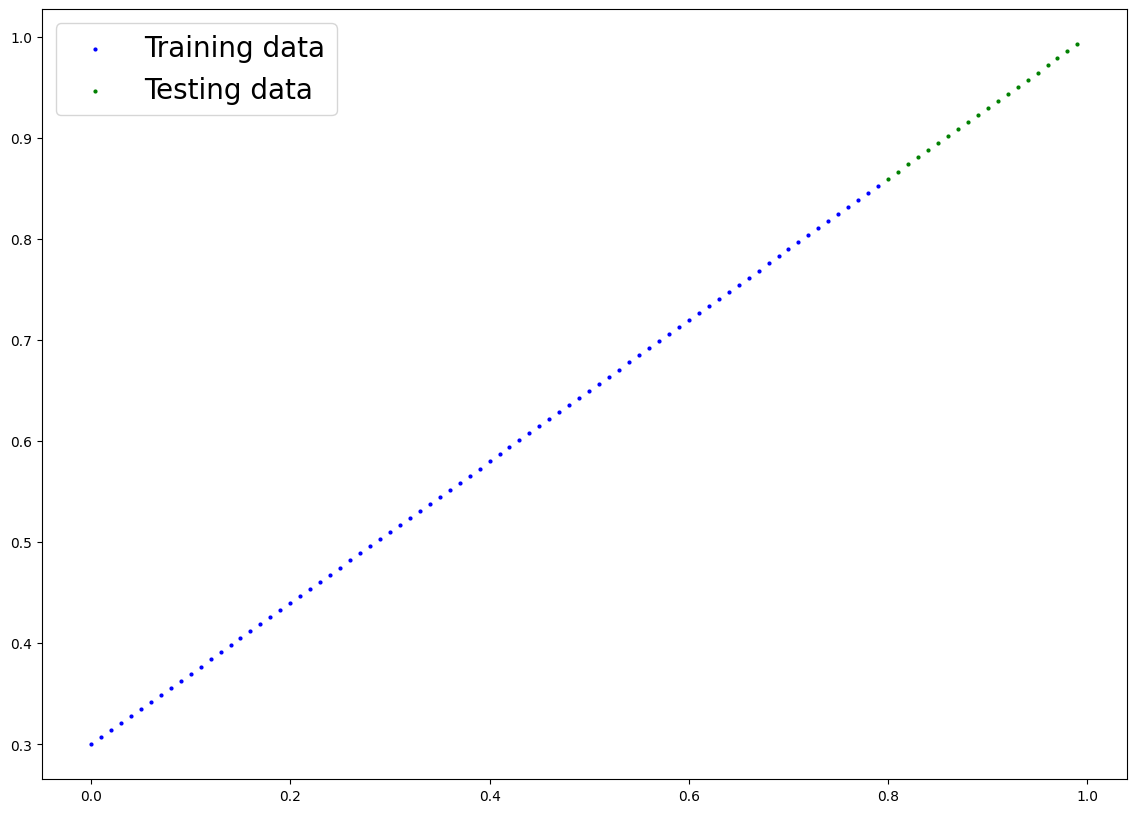

In [5]:
plot_predictions();

**Q2. Build a PyTorch model by subclassing nn.Module.**
* Inside should be a randomly initialized nn.Parameter() with requires_grad=True, one for weights and one for bias.
* Implement the forward() method to compute the linear regression function you used to create the dataset in 1.
* Once you've constructed the model, make an instance of it and check its state_dict().
**Note: If you'd like to use nn.Linear() instead of nn.Parameter() you can.*





In [6]:
# Subclass nn.Module to make our model
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)

    # Define the forward computation (input data x flows through nn.Linear())
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# Set the manual seed when creating the model
torch.manual_seed(42)
model_2 = LinearRegressionModelV2()
model_2, model_2.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [7]:
# Check model device
next(model_2.parameters()).device

device(type='cpu')

In [8]:
# Set the device to cuda if available
device = "cuda" if torch.cuda.is_available() else "cpu"

In [9]:
# Set model to GPU if it's availalble, otherwise it'll default to CPU
model_2.to(device) # the device variable was set above to be "cuda" if available or "cpu" if not
next(model_2.parameters()).device

device(type='cuda', index=0)

In [10]:
# Instantiate the model and put it to the target device
model_2.to(device)
list(model_2.parameters())

[Parameter containing:
 tensor([[0.7645]], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([0.8300], device='cuda:0', requires_grad=True)]

**Q3. Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively.**
 * Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
 * Write a training loop to perform the appropriate training steps for 300 epochs.
 * The training loop should test the model on the test dataset every 20 epochs.

In [11]:
# Create loss function
loss_fn = nn.L1Loss()

# Create optimizer
optimizer = torch.optim.SGD(params=model_2.parameters(), # optimize newly created model's parameters
                            lr=0.01)

In [12]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 300

# Put data on the available device
# Without this, error will happen (not all model/data on device)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    ### Training
    model_2.train() # train mode is on by default after construction

    # 1. Forward pass
    y_pred = model_2(X_train)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad optimizer
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Step the optimizer
    optimizer.step()

    ### Testing
    model_2.eval() # put the model in evaluation mode for testing (inference)
    # 1. Forward pass
    with torch.inference_mode():
        test_pred = model_2(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 20 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss:.5f} | Test loss: {test_loss:.5f}")

Epoch: 0 | Train loss: 0.55550 | Test loss: 0.57423
Epoch: 20 | Train loss: 0.32430 | Test loss: 0.30353
Epoch: 40 | Train loss: 0.09309 | Test loss: 0.03283
Epoch: 60 | Train loss: 0.02030 | Test loss: 0.04614
Epoch: 80 | Train loss: 0.01344 | Test loss: 0.03085
Epoch: 100 | Train loss: 0.00659 | Test loss: 0.01452
Epoch: 120 | Train loss: 0.00669 | Test loss: 0.00915
Epoch: 140 | Train loss: 0.00669 | Test loss: 0.00915
Epoch: 160 | Train loss: 0.00669 | Test loss: 0.00915
Epoch: 180 | Train loss: 0.00669 | Test loss: 0.00915
Epoch: 200 | Train loss: 0.00669 | Test loss: 0.00915
Epoch: 220 | Train loss: 0.00669 | Test loss: 0.00915
Epoch: 240 | Train loss: 0.00669 | Test loss: 0.00915
Epoch: 260 | Train loss: 0.00669 | Test loss: 0.00915
Epoch: 280 | Train loss: 0.00669 | Test loss: 0.00915


**Q4. Make predictions with the trained model on the test data.**
 * Visualize these predictions against the original training and testing data (note: you may need to make sure the predictions are not on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot)

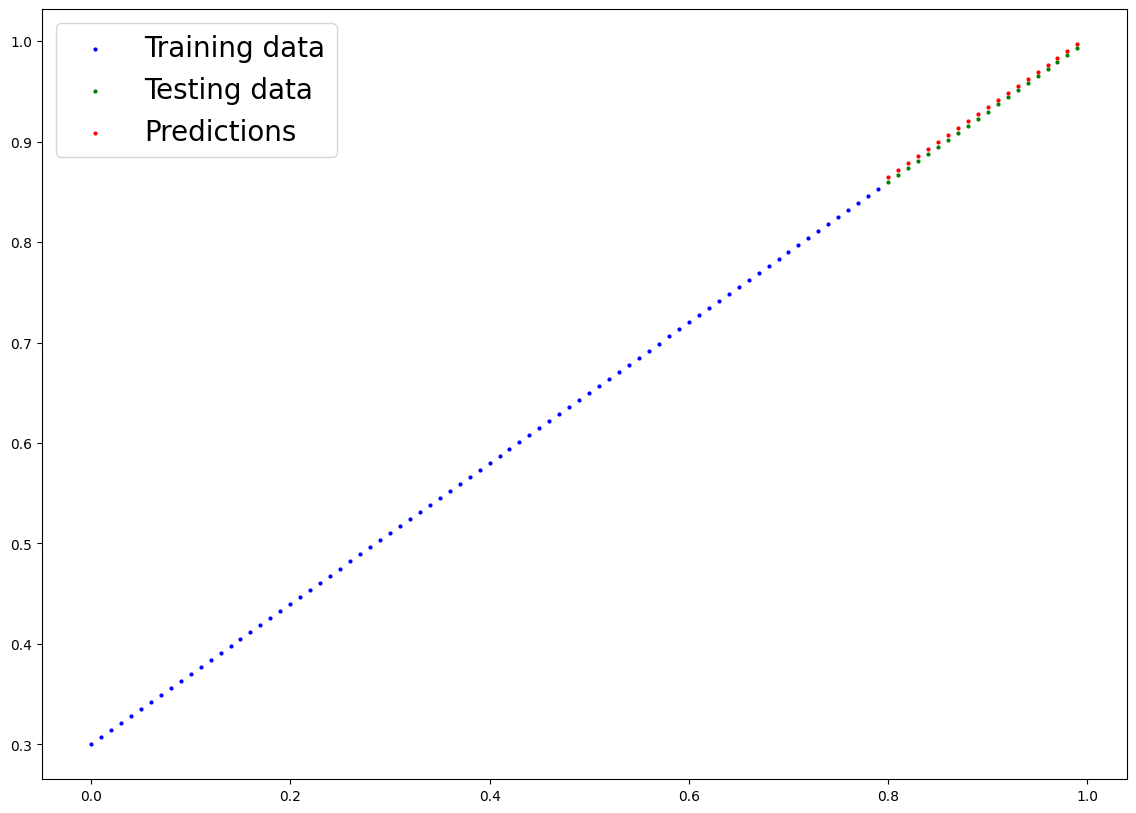

In [13]:
# plot_predictions(predictions=y_preds) # -> won't work... data not on CPU

# Put data on the CPU and plot it
plot_predictions(predictions=test_pred.cpu())

**Q5. Save your trained model's state_dict() to file.**
 * Create a new instance of your model class you made in 2. and load in the state_dict() you just saved to it.
 * Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [14]:
from pathlib import Path

# a. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# b. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# c. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_2.pth


In [15]:
# Instantiate a fresh instance of LinearRegressionModelV2
loaded_model_2 = LinearRegressionModelV2()

# Load model state dict
loaded_model_2.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put model to target device
loaded_model_2.to(device)

print(f"Loaded model:\n{loaded_model_2}")
print(f"Model on device:\n{next(loaded_model_2.parameters()).device}")

Loaded model:
LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Model on device:
cuda:0


In [17]:
# Evaluate loaded model
loaded_model_2.eval()
with torch.inference_mode():
    loaded_model_2_preds = loaded_model_2(X_test)
test_pred == loaded_model_2_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

In [19]:
loaded_model_2.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6954]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3085], device='cuda:0'))])